In [130]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2025'

In [131]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          645 non-null    object 
 1   Authors                 596 non-null    object 
 2   Author Affiliations     595 non-null    object 
 3   Publication Title       645 non-null    object 
 4   Date Added To Xplore    645 non-null    object 
 5   Publication Year        645 non-null    int64  
 6   Volume                  645 non-null    int64  
 7   Issue                   645 non-null    int64  
 8   Start Page              645 non-null    object 
 9   End Page                645 non-null    object 
 10  Abstract                594 non-null    object 
 11  ISSN                    645 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     645 non-null    object 
 14  Funding Information     526 non-null    ob

In [132]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          645 non-null    object 
 1   Authors                 596 non-null    object 
 2   Author Affiliations     595 non-null    object 
 3   Publication Title       645 non-null    object 
 4   Date Added To Xplore    645 non-null    object 
 5   Publication Year        645 non-null    int64  
 6   Volume                  645 non-null    int64  
 7   Issue                   645 non-null    int64  
 8   Start Page              645 non-null    object 
 9   End Page                645 non-null    object 
 10  Abstract                594 non-null    object 
 11  ISSN                    645 non-null    object 
 12  DOI                     645 non-null    object 
 13  Funding Information     526 non-null    object 
 14  PDF Link                645 non-null    ob

In [133]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              596 non-null    object
 1   Author Affiliations  595 non-null    object
 2   Publication Year     645 non-null    int64 
 3   Funding Information  526 non-null    object
 4   Author Keywords      593 non-null    object
 5   IEEE Terms           595 non-null    object
dtypes: int64(1), object(5)
memory usage: 30.4+ KB


In [134]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              595 non-null    object
 1   Author Affiliations  595 non-null    object
 2   Publication Year     595 non-null    int64 
 3   Funding Information  525 non-null    object
 4   Author Keywords      592 non-null    object
 5   IEEE Terms           594 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.0+ KB


In [135]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,K. S. Nikita,"School of Electrical and Computer Engineering,...",2025,NaN,NaN,NaN
1,D. R. Smith; M. Sazegar; I. Yoo,Department of Electrical and Computer Engineer...,2025,Kymeta Corporation;,Antennas;metamaterials;metasurfaces;patch ante...,Metamaterials;Integrated circuit modeling;Aper...
2,L. -Z. Song; Y. -Z. Diao; P. -Y. Qin; M. Ansar...,"Global Big Data Technologies Centre (GBDTC), U...",2025,Australia Research Council Discovery Program(g...,Broadband;gradient-index (GRIN) lens;multibeam...,Lenses;Apertures;Bandwidth;Optics;Broadband an...
3,S. Xu; Y. Shen; Z. Wei; S. Hu,"State Key Laboratory of Millimeter Waves, Scho...",2025,National Natural Science Foundation of China(g...,Beam switching;circularly polarized (CP);folde...,Metasurfaces;Antennas;PIN photodiodes;Reflecto...
4,M. Laabs; E. Zakutin; M. Obermaier; D. Plettem...,Chair of Radio Frequency and Photonics Enginee...,2025,European Commission in an Electronic Component...,Antenna arrays;mmWave over-the-air (OTA) anten...,Antenna measurements;Probes;Antenna arrays;Ant...


In [136]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            print(author)
        countries.append(aff.split(', ')[-1])

W. A. Johnson


In [137]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace("Republic of Korea", "South Korea")
countries = countries.replace("Korea", "South Korea")
countries = countries.replace("United Arab Emirates", "UAE")
countries = countries.replace("Türkiye", "Turkey")
countries = countries.replace("Türkey", "Turkey")
countries = countries.replace("Hong Kong SAR", "Hong Kong")
countries = countries.replace("Netherlands", "The Netherlands")
countries = countries.replace("SAR", "SAR China")
countries = countries.replace("U.K", "U.K.")
countries = countries.replace("China,", "China")
countries = countries.replace("P. R. China", "China")
# print(countries.info())
countries = countries[countries != 'NA']
# print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)

China              1873
USA                 141
U.K.                 92
South Korea          91
Italy                81
Germany              76
Sweden               54
Canada               49
Australia            46
Finland              43
France               43
Spain                30
India                26
The Netherlands      20
Israel               18
Belgium              17
Singapore            16
Greece               16
Denmark              16
Czech Republic       14
Iran                 13
Japan                13
Poland               12
Taiwan               10
Saudi Arabia         10
Brazil                9
Hong Kong             8
Malaysia              6
Ireland               6
Austria               6
Luxembourg            5
UAE                   3
Latvia                2
Iceland               2
Switzerland           2
Colombia              2
Belarus               2
Jordan                1
Russia                1
Ukraine               1
Kuwait                1
Vietnam         

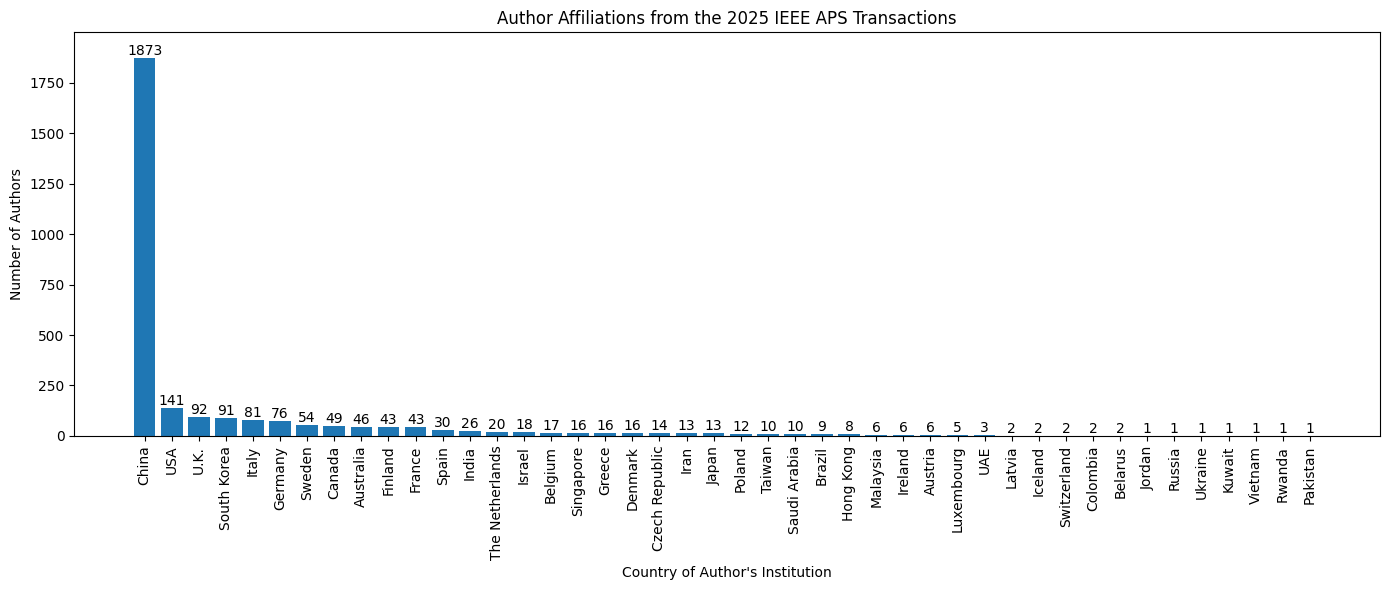

In [138]:
fig, ax = plt.subplots(figsize=(14, 6))
bar_cont = ax.bar(labels, values)
ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [139]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


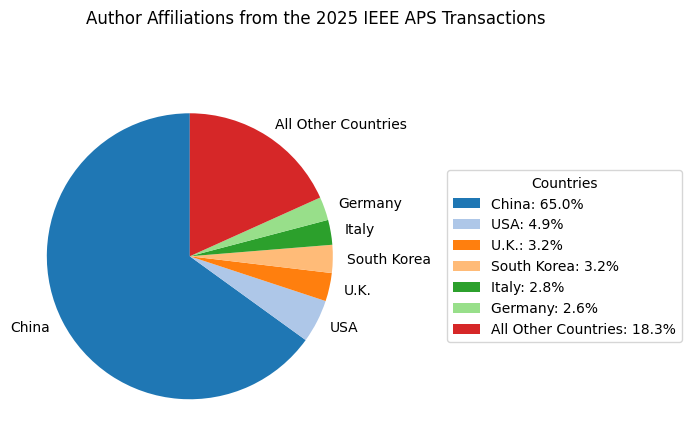

In [140]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()